#Pokretanje primjera iz uvodnog dijela laboratorijske vježbe

Na prvoj laboratorijskoj vježbi iz neuronskih mreža, studenti se upoznaju sa problemom klasifikacije, kao jednim od
najčešćih problema iz prakse. Kroz zadatke, studenti rješavaju jednostavne probleme klasifikacije nad tekstualnim
ulaznim podacima, koristeći Keras razvojni okvir.

Prikazivanje osnovnih informacija o skupu podataka poput minimalne vrijednosti, maksimalne vrijednosti, srednje vrijednosti,
standardne devijacije, i tako dalje.

In [ ]:
import pandas as pd
data = pd.read_csv('dataset.csv')
data.describe()

,id,Prisustvo,UKUPNO
count,47.000000,47.000000,47.000000
mean,24.000000,8.085106,31.418511
std,13.711309,3.977271,12.927211
min,1.000000,0.000000,0.000000
25%,12.500000,10.000000,23.835000
50%,24.000000,10.000000,35.890000
75%,35.500000,10.000000,40.525000
max,47.000000,10.000000,50.000000


Pandas modul omogućava i crtanje histograma za svaki od atributa:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f30522e25d0>,
      dtype=object)

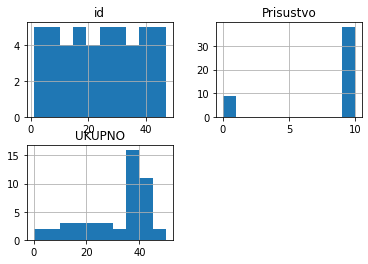

In [ ]:
import pandas as pd
data = pd.read_csv('dataset.csv')
data.hist()


Primjer vršenja normalizacije

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#pripremanje testnih podataka
X, Y = np.arange(10).reshape((5, 2)), range(5)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

#Normalizacija
scaler = MinMaxScaler().fit(x_train)
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

x_train, x_test

(array([[0.66666667, 0.66666667],
        [0.        , 0.        ],
        [1.        , 1.        ]]), array([[0., 0.],
        [1., 1.]]))

Primjer vršenja standardizacije

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#pripremanje testnih podataka
X, Y = np.arange(10).reshape((5, 2)), range(5)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

#Standardizacija
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

x_train, x_test

(array([[ 0.26726124,  0.26726124],
        [-1.33630621, -1.33630621],
        [ 1.06904497,  1.06904497]]), array([[-0.53452248, -0.53452248],
        [ 1.87082869,  1.87082869]]))

Primjer za model koji bi mogao poslužiti za binarnu klasifikaciju:

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(4000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model

Postavljanje funckije gubitka, optimizatora kao i metrike koja će se pratiti na modelu

In [ ]:
#Adam optimizator sa podrazumijevanim postavkama
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#eksplicitno podesavanje istog optimizatora
'''from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])'''


"from tensorflow import keras\nopt = keras.optimizers.Adam(learning_rate=0.01)\nmodel.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])"

#Zadatak 1 - Binarna klasifikacija - Klasifikacija vina

a) Učitati podatke za crno i bijelo vino koji se nalaze u CSV datotekama winequality-red.csv i winequality-white.csv
u varijable red i white respektivno. Pri ovome postaviti parametar separator da bude znak tačka-zarez
(;). U odgovarajućim DataFrame objektima dodati novu kolonu label koja će imati vrijednost 0 za podatke
bijelog vina, a vrijednost 1 za podatke crnog vina. Nakon ovoga spojiti ih u jedan DataFrame objekat wines.

In [ ]:
import pandas as pd
import numpy as np

#ucitavanje podataka, kao i postavljanje separatora
red = pd.read_csv("winequality-red.csv",sep=";")
white = pd.read_csv("winequality-white.csv",sep=";")

#dodavanje kolone "label", gdje je crvenom vinu label = 1, a bijelom = 0
red["label"] = 1
white["label"] = 0

#spajanje u jedan DataFrame objekat
wines = pd.concat([white,red],ignore_index=True)
wines



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


b) Izvršiti prikaz osnovnih podataka spojenog skupa podataka korištenjem **describe** metode te nacrtati histograme korištenjem **hist** metode. Šta možete zaključiti o podacima?

In [ ]:
wines.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3052e64e90>,
      dtype=object)

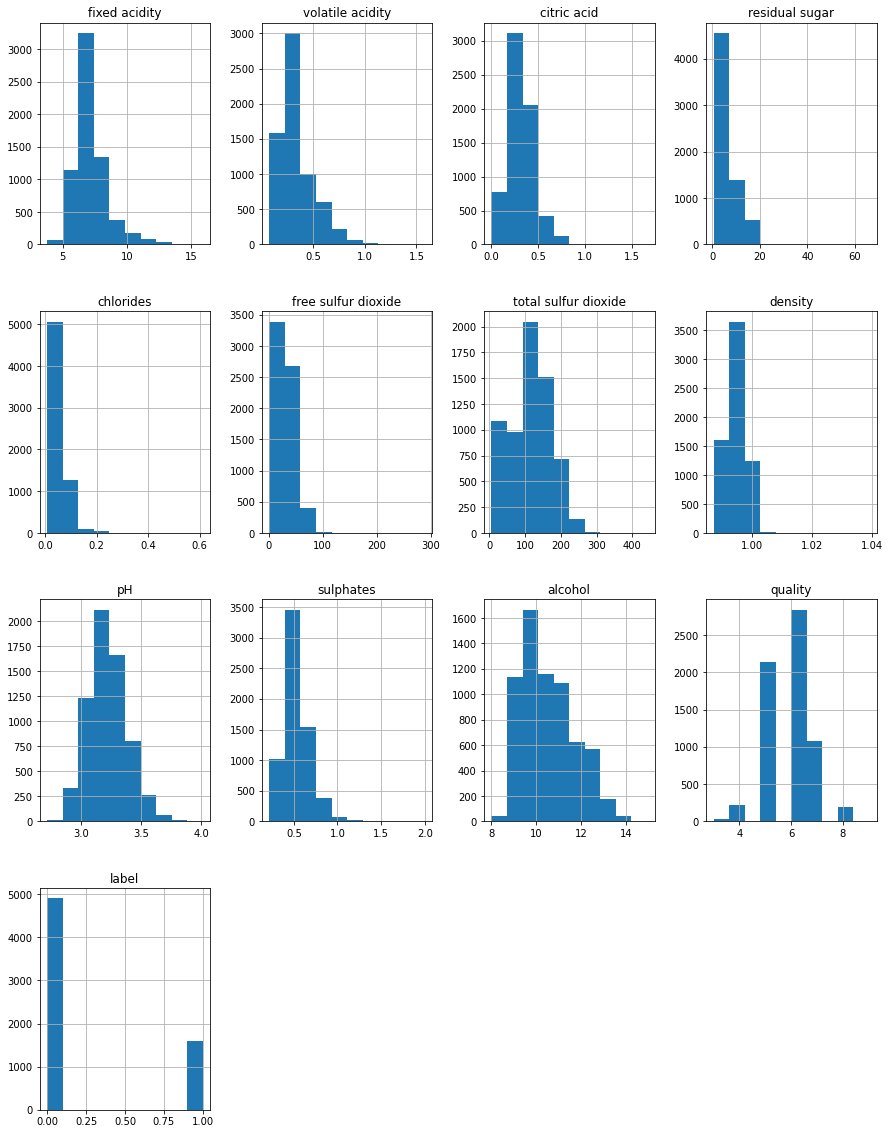

In [ ]:
wines.hist(figsize=(15,20))

c) Iz wines izdvojiti X - karakteristike i y - labele. Zatim korištenjem funkcije train_test_split podijeliti
podatke na one za treniranje i one za testiranje pri čemu 20% podataka trebaju biti podaci za testiranje;

In [ ]:
#izdvoji/pripremi/razvrstaj podatke za train i test split
x = wines.drop("label",axis=1)
y = wines["label"]

#razdvajanje podataka na skupove za treniranje i za testiranje
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


d) Formirati sekvencijalni Keras model koji će imati 2 Dense sloja sa po 8 neurona i relu aktivacijskom
funkcijom. Prvom sloju kao input_shape parametar proslijediti vrijednost (12,) s obzirom na to da skup
podataka ima 12 značajki. Treći sloj, koji je u ovom slučaju izlazni sloj, postaviti da također bude Dense, ali
sa samo jednim neuronom;

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(8, activation = "relu", input_shape=(12,)))
model.add(layers.Dense(8, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))


e) Kompajlirati model tako da koristi adam optimizator, za funkciju gubitka koristiti binary_crossentropy,
a kao metriku odabrati accuracy;

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


f) Model istrenirati na 20 epoha, sa veličinom batch-a 16.

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=16, validation_split=0.2)


Epoch 1/20
260/260 [==============================] - 1s 3ms/step - loss: 0.4484 - accuracy: 0.8126 - val_loss: 0.2518 - val_accuracy: 0.9029
Epoch 2/20
260/260 [==============================] - 1s 2ms/step - loss: 0.2159 - accuracy: 0.9230 - val_loss: 0.1968 - val_accuracy: 0.9356
Epoch 3/20
260/260 [==============================] - 1s 2ms/step - loss: 0.1898 - accuracy: 0.9389 - val_loss: 0.1872 - val_accuracy: 0.9365
Epoch 4/20
260/260 [==============================] - 1s 2ms/step - loss: 0.1832 - accuracy: 0.9408 - val_loss: 0.1747 - val_accuracy: 0.9462
Epoch 5/20
260/260 [==============================] - 1s 2ms/step - loss: 0.1762 - accuracy: 0.9427 - val_loss: 0.1722 - val_accuracy: 0.9452
Epoch 6/20
260/260 [==============================] - 1s 2ms/step - loss: 0.1701 - accuracy: 0.9437 - val_loss: 0.1615 - val_accuracy: 0.9538
Epoch 7/20
260/260 [==============================] - 1s 2ms/step - loss: 0.1644 - accuracy: 0.9454 - val_loss: 0.1562 - val_accuracy: 0.9548
Epoch 

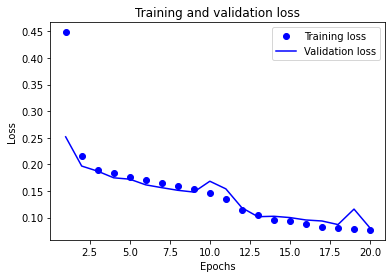

In [ ]:
from matplotlib import pyplot as plt
acc = history.history['accuracy']
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

g) Ponoviti postupak, no ovaj put prije treniranja izvršiti standardizaciju, odnosno skaliranje atributa korištenjem
StandardScaler objekat iz sklearn.preprocessing modula. Kolika je sada tačnost nakon treniranja?
Uporediti rezultate sa onim bez skaliranja

In [ ]:
red = pd.read_csv("winequality-red.csv",sep=";")
white = pd.read_csv("winequality-white.csv",sep=";")
X = wines.drop("label",axis=1)
y = wines["label"]
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2)


Epoch 1/20
260/260 [==============================] - 1s 3ms/step - loss: 0.3049 - accuracy: 0.9290 - val_loss: 0.1206 - val_accuracy: 0.9721
Epoch 2/20
260/260 [==============================] - 1s 2ms/step - loss: 0.0904 - accuracy: 0.9755 - val_loss: 0.0738 - val_accuracy: 0.9837
Epoch 3/20
260/260 [==============================] - 1s 2ms/step - loss: 0.0613 - accuracy: 0.9827 - val_loss: 0.0612 - val_accuracy: 0.9875
Epoch 4/20
260/260 [==============================] - 1s 3ms/step - loss: 0.0496 - accuracy: 0.9868 - val_loss: 0.0572 - val_accuracy: 0.9875
Epoch 5/20
260/260 [==============================] - 1s 2ms/step - loss: 0.0428 - accuracy: 0.9892 - val_loss: 0.0536 - val_accuracy: 0.9885
Epoch 6/20
260/260 [==============================] - 1s 2ms/step - loss: 0.0382 - accuracy: 0.9911 - val_loss: 0.0527 - val_accuracy: 0.9904
Epoch 7/20
260/260 [==============================] - 1s 3ms/step - loss: 0.0351 - accuracy: 0.9923 - val_loss: 0.0517 - val_accuracy: 0.9913
Epoch 

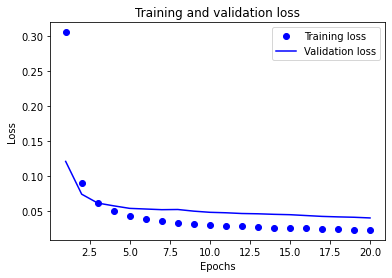

In [ ]:
from matplotlib import pyplot as plt
acc = history.history['accuracy']
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

h) Model evaluirati nad testnim skupom podataka. Kolika je postignuta tačnost modela?

In [ ]:
results = model.evaluate(x_test, y_test)
print("Postignuta je tacnost: ",results[1])

41/41 [==============================] - 0s 4ms/step - loss: 31.2891 - accuracy: 0.7585
Postignuta je tacnost:  0.7584615349769592
